# Model Training

#### 1.1 Import Data and required packages

In [33]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# modeling imports
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [34]:
df=pd.read_csv("Data/stud.csv")

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [36]:
X = df.drop(columns=['math_score'],axis=1)

In [37]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [38]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [39]:
y = df["math_score"]

In [40]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [41]:
# Create column transformer with 3 types of transformers
num_features= X.select_dtypes(exclude="object").columns
cat_feaures = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
  [
    ("OneHotEncoder",oh_transformer, cat_feaures),
    ("StandardScaler",numeric_transformer, num_features),
  ]
)


In [42]:
X = preprocessor.fit_transform(X)

In [43]:
X.shape

(1000, 19)

In [44]:
# Splitting dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=11)


In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### Create an Evaluate Function to give all metrics after model Training

In [50]:
def eval_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = eval_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = eval_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2657
- Mean Absolute Error: 4.1776
- R2 Score: 0.8849
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5830
- Mean Absolute Error: 4.5316
- R2 Score: 0.8287


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5444
- Mean Absolute Error: 5.1362
- R2 Score: 0.8223
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4162
- Mean Absolute Error: 5.1600
- R2 Score: 0.7737


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2660
- Mean Absolute Error: 4.1762
- R2 Score: 0.8849
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5827
- Mean Absolute Error: 4.5298
- R2 Score: 0.8287


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8604
- Mean Absolute Error: 4.6185
- R2 Score: 0.8575
-----------------------

### Results

In [56]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.828688
0,Linear Regression,0.828670
7,CatBoosting Regressor,0.814897
5,Random Forest Regressor,0.795759
8,AdaBoost Regressor,0.788485
1,Lasso,0.773717
6,XGBRegressor,0.773165
3,K-Neighbors Regressor,0.747938
4,Decision Tree,0.634309


# Linear Regression

In [57]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Model Accuracy is %2.f" %score)

Model Accuracy is 83


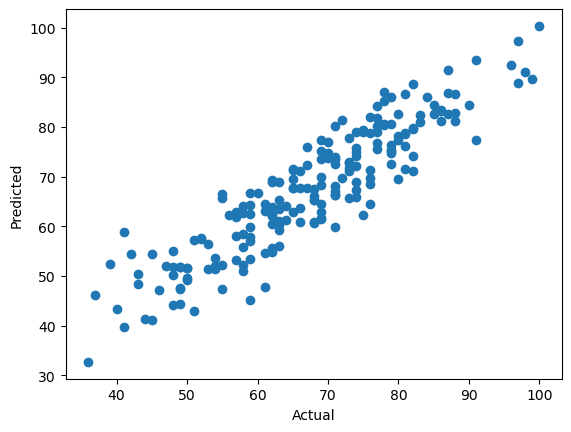

In [58]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

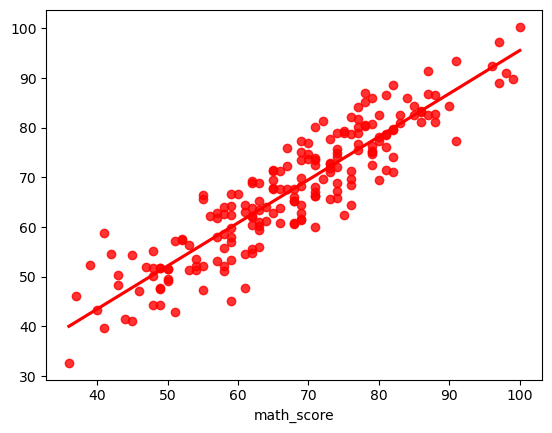

In [59]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


#### Difference between Actual and Predicted Values

In [60]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
25,73,72.992188,0.007812
464,75,62.354492,12.645508
372,74,79.013672,-5.013672
730,68,65.327148,2.672852
757,70,73.804688,-3.804688
...,...,...,...
278,65,71.429688,-6.429688
449,81,78.789062,2.210938
221,87,82.660156,4.339844
741,37,46.084961,-9.084961
